In [14]:
 !pip install pandas matplotlib seaborn scikit-learn  requests 



Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement urllib.parse (from versions: none)
ERROR: No matching distribution found for urllib.parse


In [1]:
import pandas as pd

df=pd.read_csv('./data/historical_stock_data_SBI.csv')
df.head(5)

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2023-06-16,EQ,568.75,574.70,567.05,566.50,570.00,571.25,570.69,629.55,430.7,12660226,7.225084e+09,178755,SBIN
1,2023-06-15,EQ,576.00,576.70,565.25,576.55,566.75,566.50,571.49,629.55,430.7,17934877,1.024959e+10,232221,SBIN
2,2023-06-14,EQ,577.00,578.55,575.25,576.40,576.35,576.55,576.96,629.55,430.7,8948696,5.163047e+09,122388,SBIN
3,2023-06-13,EQ,579.45,581.40,574.25,578.65,576.35,576.40,576.44,629.55,430.7,12612098,7.270080e+09,198530,SBIN
4,2023-06-12,EQ,580.00,581.50,577.70,578.70,578.55,578.65,579.37,629.55,430.7,8786066,5.090356e+09,129364,SBIN


In [6]:
df.tail()

,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
DATE,,,,,,,,,,,,,,
2022-01-07,EQ,493.45,501.95,489.45,491.70,491.25,491.25,495.38,542.3,269.5,22746330,1.126809e+10,254165,SBIN
2022-01-06,EQ,487.70,494.40,485.40,492.40,491.35,491.70,490.44,542.3,269.5,18190843,8.921514e+09,195393,SBIN
2022-01-05,EQ,481.90,495.00,479.15,483.50,491.70,492.40,489.50,542.3,269.5,24694169,1.208792e+10,240463,SBIN
2022-01-04,EQ,472.50,484.70,471.05,470.80,483.75,483.50,479.89,542.3,269.5,23296671,1.117985e+10,246431,SBIN
2022-01-03,EQ,462.00,472.00,460.10,460.45,471.50,470.80,467.17,542.3,269.5,13124509,6.131388e+09,168001,SBIN


<Axes: xlabel='DATE'>

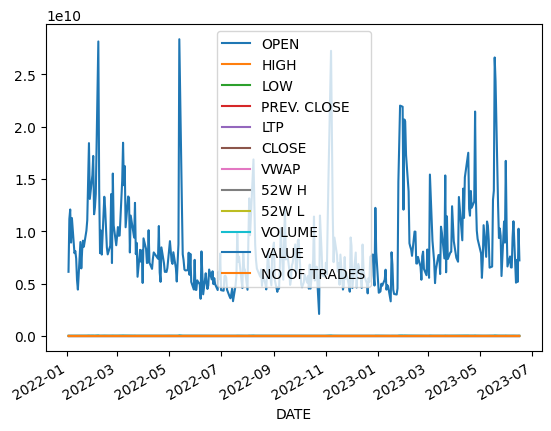

In [7]:
df.plot()


In [21]:

# Plotting the data
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

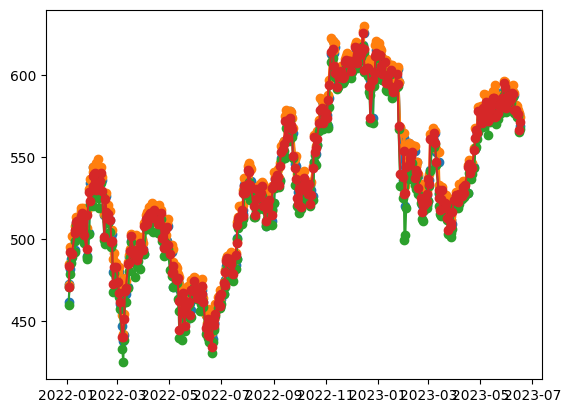

In [22]:
# Plot the OPEN, HIGH, LOW, and CLOSE prices
plt.plot(df.index, df['OPEN'], marker='o', label='OPEN')
plt.plot(df.index, df['HIGH'], marker='o', label='HIGH')
plt.plot(df.index, df['LOW'], marker='o', label='LOW')
plt.plot(df.index, df['CLOSE'], marker='o', label='CLOSE')


/tmp/ipykernel_397139/1570133359.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


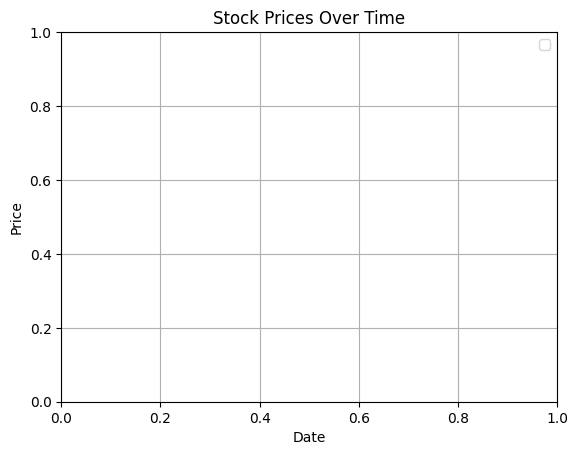

In [23]:
# Adding titles and labels
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


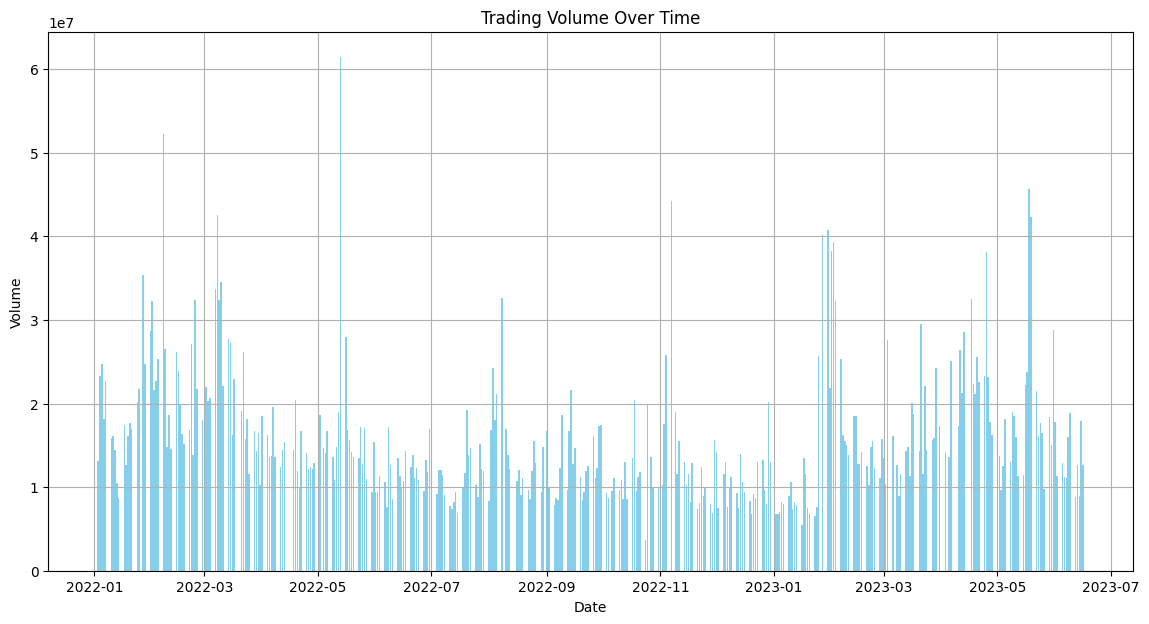

In [25]:
# Plotting the Volume
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['VOLUME'], color='skyblue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [26]:
# Drop non-numeric columns for correlation matrix
numeric_df = df.drop(columns=['SERIES', 'SYMBOL'])

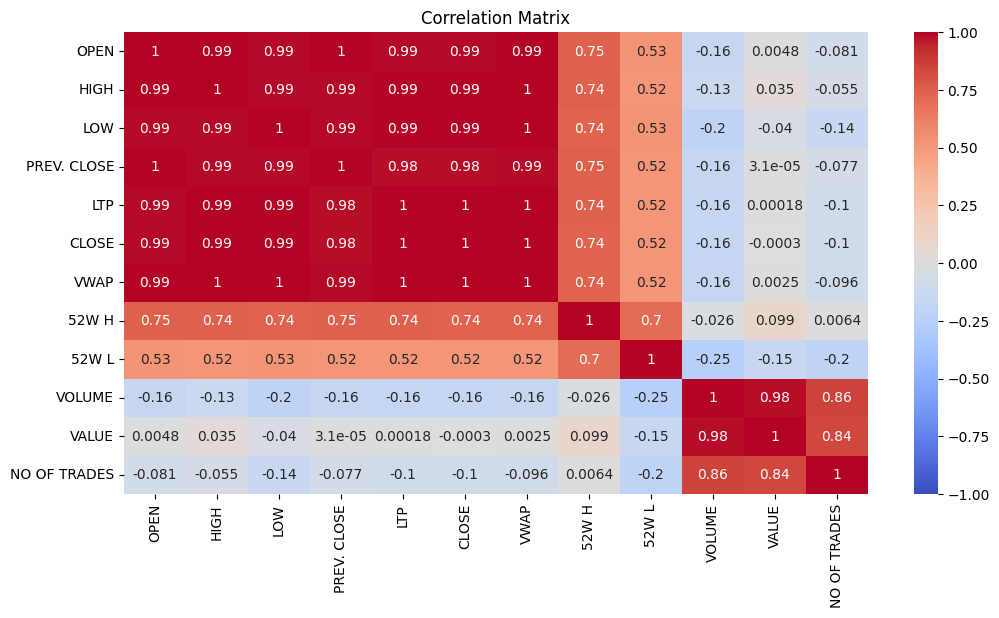

In [27]:
# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Normalize the data for the deep learning model
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns, index=numeric_df.index)

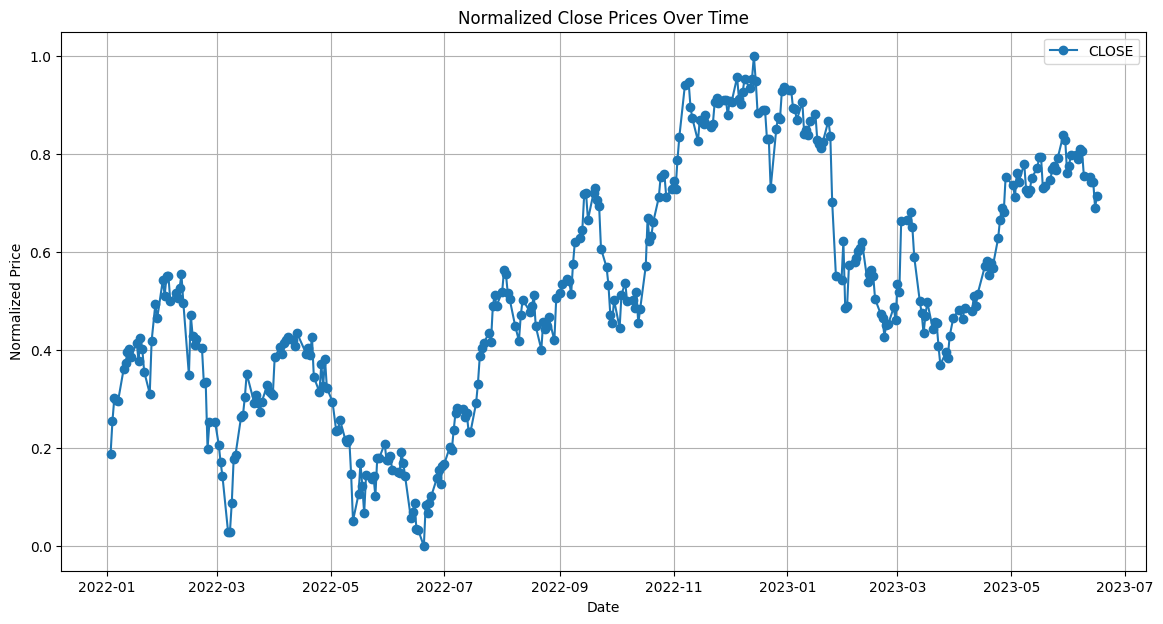

In [29]:
# Plot the normalized data
plt.figure(figsize=(14, 7))
plt.plot(scaled_df.index, scaled_df['CLOSE'], marker='o', label='CLOSE')
plt.title('Normalized Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Save the preprocessed data to a new CSV file
scaled_df.to_csv('preprocessed_stock_data_SBIN.csv')
print("Preprocessed data saved to 'preprocessed_stock_data_SBIN.csv'")